# Assignment A2 [40 marks]



The assignment consists of 3 exercises. Each exercise may contain coding and/or discussion questions.
- Type your **code** in the **code cells** provided below each question.
- For **discussion** questions, use the **Markdown cells** provided below each question, indicated by 📝. Double-click these cells to edit them, and run them to display your Markdown-formatted text. Please refer to the Week 1 tutorial notebook for Markdown syntax.

---

# Question 1: Quadrature [16 marks]

In the course, we have seen Newton-Cotes interpolatory quadrature rules, which have the particular property that they use equally-spaced nodes. Other types of quadrature rules also exist.

In this question, we will consider quadrature rules with $N$ nodes, where the nodes $x_k$ are defined as the Chebyshev nodes, i.e.

$$
x_k = \cos\left(\frac{(2k-1)\pi}{2N}\right), \quad
k=1, \dots, N.
$$

**1.1** Write a function `cheb_nodes()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the $N$ Chebyshev nodes, as defined above.

**[2 marks]**

In [ ]:
import numpy as np

def cheb_nodes(N):  # function taking 1 input argument, N
    
    k = np.array(range(N)) # creates a numpy vector of length N
    xk = np.cos(((2*k - 1) * np.pi) / (2 * N))  # imports this value into the given xk function

    return xk

**1.2** Write a function `cheb_weights()` which takes 1 input argument, a strictly positive integer `N`, and returns a NumPy vector of length $N$ containing the **weights** $w_k$ associated with the interpolatory quadrature rule whose nodes are the $x_k$ as defined above.

For testing: the weights for $N = 3$ are $\left\{\frac{4}{9}, \frac{10}{9}, \frac{4}{9}\right\}$.

**[6 marks]**

**1.3** Consider the following integral, with a known closed form:

$$
I = \int_{-\pi/4}^{\pi/4}  \frac{1}{\cos^3(x)} \ dx =  \sqrt{2} + 2 \text{ arctanh}\left(\tan\left(\frac{\pi}{8}\right)\right).
$$

Test your quadrature rule by using it to approximate $I$ and compare the computed result to the exact value of the integral.

(For $N = 3$, you should obtain an error of approximately $0.0627$.)

**[3 marks]**

**1.4** Investigate the accuracy of the quadrature rules you obtain using your functions `cheb_nodes()` and `cheb_weights()` for a range of different values of $p$.

Summarise and explain your results in a discussion of no more than 250 words.

**[5 marks]**

***📝 Discussion for question 1.4***

---
# Question 2: Numerical differentiation [10 marks]


Consider a finite difference approximation 

$$
F' \left( x \right) \approx D \left( x \right) = \frac{1}{\Delta x} \left[ -\frac{1}{8} F \left( x - 2\Delta x \right) -\frac{3}{4} F \left( x \right) + F \left( x + \Delta x \right) - \frac{1}{8} F \left( x + 2 \Delta x \right) \right].
$$

By considering the derivative of the function $F \left( x \right) = \sin x$ at $x = 1$, perform numerical experiments to investigate the accuracy of this approximation. Your code should generate appropriate output and/or figures to illustrate the results.

Confirm your results analytically. (You can either use the Markdown cell below, or submit a PDF of your handwriting if you prefer.)

**[10 marks]**

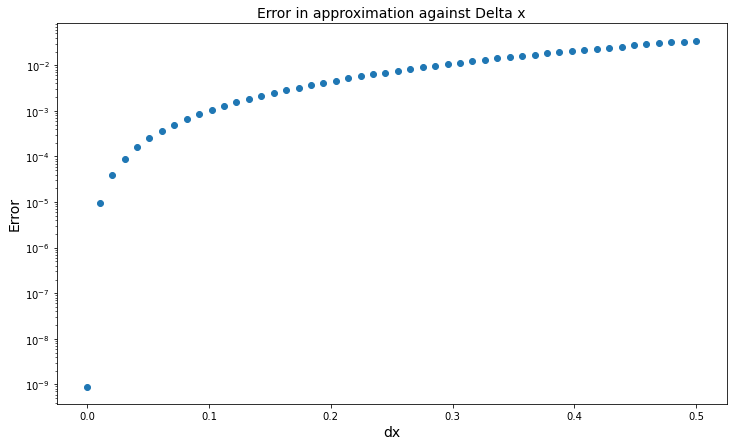

The actual derivative of the function at x = 1 is 0.5403023058681398


In [23]:
import matplotlib.pyplot as plt
%matplotlib inline


def F(x):
    return np.sin(x)

def F_derivative(x):
    return np.cos(x)

def derivative(F, x, dx):

    y = ((-1 / 8) * F(x - 2*dx) - (3 / 4) * F(x) + F(x + dx) - (1 / 8) * F(x + 2 * dx)) / dx

    return y


dx = np.linspace(0.0001, 0.5, 50)
approx_derivative = derivative(F, 1, dx)

actual = F_derivative(1)

err = np.abs(actual - approx_derivative)

fig, ax = plt.subplots(figsize = (12, 7))
ax.scatter(dx, err)
ax.set_xlabel('dx', fontsize = 14)
ax.set_ylabel('Error', fontsize = 14)
ax.set_title('Error in approximation against Delta x', fontsize = 14)
ax.set_yscale('Log')


plt.show()
print(f'The actual derivative of the function at x = 1 is {actual}')



***📝 Question 2***

The above graph calculation implies that, as delta x approaches 0, or as it decreases in size, then the error value for the 
approximated function decreases in size; implying that the difference approximation is a realistic interpretation of the 
derivative of sin(x) at x = 1. We are able to get to within an error value of 10E-9 as dx is equal to 0.0001. AS dx increases
in value, such as to 0.5, then the error bound can reach up to 0.1, which can give a roughly 20% error.

---
# Question 3: Root finding [14 marks]

Consider the function

$$
  F \left( x \right) = \ln x - x + 4.
$$

**3.1** Plot the function over the interval $x \in (0, 10]$.

**[2 marks]**

<ipython-input-21-c6f4452d1262>:8: RuntimeWarning: divide by zero encountered in log
  return np.log(x) - x + 4


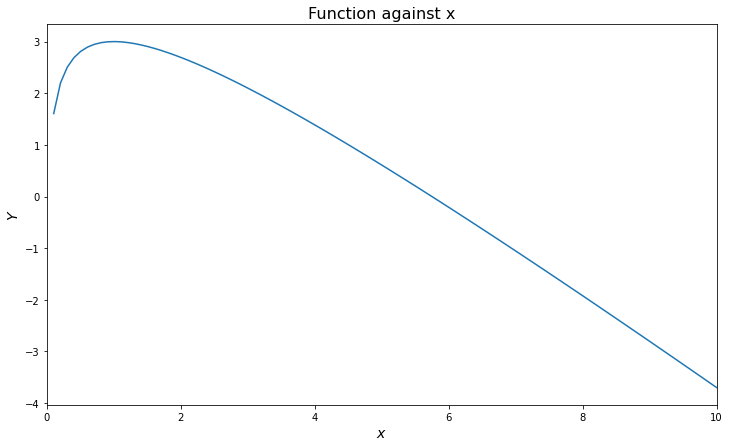

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
import math
import numpy as np

def F(x):
    
    return np.log(x) - x + 4

x = np.linspace(0, 10, 100)

fig, ax = plt.subplots(figsize = (12, 7))
ax.plot(x, F(x))
ax.set_xlim(0, 10)
ax.set_xlabel(r'$x$', fontsize = 14)
ax.set_ylabel(r'$Y$', fontsize = 14)
ax.set_title(r'Function against x', fontsize = 16)

plt.show()

**3.2** Find the root of $F$ in the interval $[4, 8]$, using 2 different methods: a bracketing method of your choice, and Newton's method.

**[4 marks]**

**3.3** Consider a third method to find this root, defined as the fixed-point iteration

$$
  x_n = G \left( x_{n - 1} \right) \textrm{ for } n = 1, 2, \ldots,
$$

with iteration function

$$
  G \left( x \right) = \alpha \left( \ln x - x + 4 \right) + x,
$$

where $\alpha$ is a real parameter to be specified.

Using an initial guess $x_0 = 5$, use this fixed-point iteration to seek the root, considering different values of $\alpha \in \left[ 1, 5 \right]$.

Discuss and explain the convergence properties of this fixed-point iteration. Your code should generate appropriate output and/or figures to illustrate the results and to support your discussion.

You can use the Markdown cell below for discussion, or submit a PDF of your handwriting if you prefer.

**[8 marks]**

***📝 Discussion for question 3.3***